# **Dependent/Independent model Construction/Analysis without feature Scaling**

## **Libraries**

In [ ]:
pip install keras_tuner

In [ ]:
import pandas as pd # Library to process the dataframe
import numpy as np # Library to handle with numpy arrays
import warnings # Library that handles all the types of warnings during execution
import matplotlib.pyplot as plt# Library that handles ploting of  the graphs
warnings.filterwarnings("ignore") # Ignore all the warnings

In [ ]:
from tensorflow import keras 
from kerastuner.tuners import BayesianOptimization
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.optimizers import Adam
import kerastuner as kt
import os

### **Data Preprocessing**

In [ ]:
def process(df):
  # input: unprocessed dataframe
  # output: processed dataframe
  df.reset_index(inplace=True)
  p=list(df.iloc[:,-1].values)
  #p.pop(0)
  df=df.drop(columns=['nfl_data']) # removing the header of dataframe
  df=df.rename(columns={"level_0":"Index","level_1":"Date(IST)","level_2":"NFO","level_3":"NFH","level_4":"NFL","level_5":"NFC","level_6":"FIIB","level_7":"FIIS","level_8":"FIIN","level_9":"DIIB","level_10":"DIIS","level_11":"DIIN","level_12":"August","level_13":"December","level_14":"CAD","level_15":"DAD","level_16":"DOD","level_17":"NDAD","level_18":"Currey","level_19":"Flow","level_20":"Shine"})
  df['Vega']=p
  df=df.drop(0)
  #print(df.columns)
  df=df.drop(columns=['Index'])
  df=df.dropna(how='any')
  df['NFO']=pd.to_numeric(df['NFO']).astype(float)
  df['NFH']=pd.to_numeric(df['NFH']).astype(float)
  df['NFL']=pd.to_numeric(df['NFL']).astype(float)
  df['NFC']=pd.to_numeric(df['NFC']).astype(float)
  df['FIIB']=pd.to_numeric(df['FIIB']).astype(float)
  df['FIIS']=pd.to_numeric(df['FIIS']).astype(float)
  df['FIIN']=pd.to_numeric(df['FIIN']).astype(float)
  df['DIIB']=pd.to_numeric(df['DIIB']).astype(float)
  df['DIIS']=pd.to_numeric(df['DIIS']).astype(float)
  df['August']=pd.to_numeric(df['August']).astype(float)
  df['December']=pd.to_numeric(df['December']).astype(float)
  df['CAD']=pd.to_numeric(df['CAD']).astype(float)
  df['DAD']=pd.to_numeric(df['DAD']).astype(float)
  df['DOD']=pd.to_numeric(df['DOD']).astype(float)
  df['NDAD']=pd.to_numeric(df['NDAD']).astype(float)
  df['Flow']=pd.to_numeric(df['Flow']).astype(float)
  df['Currey']=pd.to_numeric(df['Currey']).astype(float)
  df['Shine']=pd.to_numeric(df['Shine']).astype(float)
  df['Vega']=pd.to_numeric(df['Vega']).astype(float)
  df['nfh']=df['NFH']
  df['nfl']=df['NFL']
  df=df.drop(columns=['NFH','NFL'])
  
  return df

In [ ]:
df=pd.read_csv('csv_nfl_data.csv')
df=process(df)
df


,Date(IST),NFO,NFC,FIIB,FIIS,FIIN,DIIB,DIIS,DIIN,August,December,CAD,DAD,DOD,NDAD,Currey,Flow,Shine,Vega,nfh,nfl
1,2020-01-02,12115.673242,12216.272367,2670.78,1982.02,688.76,3490.16,3426.21,63.95,1356.0,482.0,-0.01,0.3970,-0.98,0.72,-0.0520,0.0399,-0.10,-1.309999,12177.119957,12151.571552
2,2020-01-03,12195.406448,12251.196928,4514.35,3251.30,1263.05,2750.87,3780.07,-1029.2,879.0,973.0,-0.23,-0.5100,-1.33,0.46,0.4430,0.5648,0.08,1.550000,12275.487382,12173.355954
3,2020-01-06,12272.929018,12228.903255,3732.00,3835.84,-103.84,3778.78,3802.48,-23.7,360.0,1502.0,-0.17,0.0150,-0.21,-0.07,0.0877,-0.0690,-0.18,-0.170000,12299.127043,12181.887534
4,2020-01-07,12237.309351,12051.960005,3911.17,4593.40,-682.23,4205.16,3893.97,311.19,1248.0,578.0,-0.21,-0.0500,-0.02,-1.79,-0.0437,-0.0208,0.08,-0.060000,12242.227141,12030.371144
5,2020-01-08,12149.137851,12017.343536,4109.04,4624.89,-515.85,5162.02,4413.62,748.4,725.0,1109.0,0.56,0.3050,0.54,-0.59,-0.2980,-0.6992,-0.65,-0.340000,12192.474725,11985.555622
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,2021-06-24,15832.780716,15711.203010,7094.36,9985.30,-2890.94,5377.76,4239.00,1138.76,783.0,1186.0,0.67,0.2234,-0.04,-0.16,0.0900,0.0880,0.01,-0.349999,15871.734957,15673.598435
353,2021-06-25,15781.799179,15763.679655,6766.31,7445.15,-678.84,6844.01,5011.25,1832.76,1070.0,902.0,0.54,0.1000,0.18,0.27,-0.0515,0.1500,-0.08,-0.350000,15846.875708,15703.024907
354,2021-06-28,15829.576703,15838.276361,4275.71,5934.43,-1658.72,5634.19,4357.11,1277.08,1069.0,940.0,-0.90,-0.1242,-0.39,-0.96,0.1515,-0.3200,-0.19,0.140000,15869.452759,15764.937429
355,2021-06-29,15904.676773,15837.898386,10932.02,10815.39,116.63,8687.31,6877.26,1810.05,903.0,1084.0,-0.52,-0.3158,0.08,-0.26,0.0040,0.2000,-0.17,0.260000,15910.968841,15804.933350


#### **Note: here the out of the different tuning algorithms: RandomSearch, BayesianOptimization and Hyperband , i have chose the bayesianOptimization**

## **Dependent Model Analysis (Pipeline Model)**

In [ ]:
Df=df.copy()
df=df.drop(columns=['nfl'])
df


,Date(IST),NFO,NFC,FIIB,FIIS,FIIN,DIIB,DIIS,DIIN,August,December,CAD,DAD,DOD,NDAD,Currey,Flow,Shine,Vega,nfh
1,2020-01-02,12115.673242,12216.272367,2670.78,1982.02,688.76,3490.16,3426.21,63.95,1356.0,482.0,-0.01,0.3970,-0.98,0.72,-0.0520,0.0399,-0.10,-1.309999,12177.119957
2,2020-01-03,12195.406448,12251.196928,4514.35,3251.30,1263.05,2750.87,3780.07,-1029.2,879.0,973.0,-0.23,-0.5100,-1.33,0.46,0.4430,0.5648,0.08,1.550000,12275.487382
3,2020-01-06,12272.929018,12228.903255,3732.00,3835.84,-103.84,3778.78,3802.48,-23.7,360.0,1502.0,-0.17,0.0150,-0.21,-0.07,0.0877,-0.0690,-0.18,-0.170000,12299.127043
4,2020-01-07,12237.309351,12051.960005,3911.17,4593.40,-682.23,4205.16,3893.97,311.19,1248.0,578.0,-0.21,-0.0500,-0.02,-1.79,-0.0437,-0.0208,0.08,-0.060000,12242.227141
5,2020-01-08,12149.137851,12017.343536,4109.04,4624.89,-515.85,5162.02,4413.62,748.4,725.0,1109.0,0.56,0.3050,0.54,-0.59,-0.2980,-0.6992,-0.65,-0.340000,12192.474725
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,2021-06-24,15832.780716,15711.203010,7094.36,9985.30,-2890.94,5377.76,4239.00,1138.76,783.0,1186.0,0.67,0.2234,-0.04,-0.16,0.0900,0.0880,0.01,-0.349999,15871.734957
353,2021-06-25,15781.799179,15763.679655,6766.31,7445.15,-678.84,6844.01,5011.25,1832.76,1070.0,902.0,0.54,0.1000,0.18,0.27,-0.0515,0.1500,-0.08,-0.350000,15846.875708
354,2021-06-28,15829.576703,15838.276361,4275.71,5934.43,-1658.72,5634.19,4357.11,1277.08,1069.0,940.0,-0.90,-0.1242,-0.39,-0.96,0.1515,-0.3200,-0.19,0.140000,15869.452759
355,2021-06-29,15904.676773,15837.898386,10932.02,10815.39,116.63,8687.31,6877.26,1810.05,903.0,1084.0,-0.52,-0.3158,0.08,-0.26,0.0040,0.2000,-0.17,0.260000,15910.968841


### **Train/Test Split**

In [ ]:
df_permutated = df.sample(frac=1)

train_size = 0.7# 70%-train set and 30% -test set
train_end = int(len(df_permutated)*train_size)

df_train = df_permutated[:train_end]
df_test = df_permutated[train_end:]

In [ ]:
df_train=df_train.reset_index()
df_train.to_csv('train.csv')


In [ ]:
df_train=df_train.drop(columns=['index','Date(IST)'])

In [ ]:
df_train

,NFO,NFC,FIIB,FIIS,FIIN,DIIB,DIIS,DIIN,August,December,CAD,DAD,DOD,NDAD,Currey,Flow,Shine,Vega,nfh
0,14720.272745,14837.949916,14123.81,13935.73,188.08,5174.63,5921.20,-746.57,1258.0,677.0,-1.04,-0.4575,-2.34,-1.67,0.3150,-0.0200,-0.65,7.549999,14932.588713
1,13601.914093,13695.139785,5426.77,3077.24,2349.53,2386.77,4397.27,-2010.5,944.0,1008.0,-0.34,0.6650,-0.46,0.52,-0.2070,-0.0329,0.01,1.549999,13727.342217
2,13540.387443,13472.237080,5365.66,4829.53,536.13,4040.67,5367.59,-1326.92,1631.0,322.0,0.69,0.5096,0.08,-1.95,-0.0390,0.2953,0.31,-0.920000,13630.236726
3,10409.016913,10382.386367,4220.40,4973.58,-753.18,4763.50,3459.32,1304.18,1116.0,770.0,-0.84,-0.7250,-0.18,-2.87,0.0725,-0.2662,0.14,2.509998,10499.668023
4,13497.858862,13568.790119,7663.53,5403.55,2259.98,3390.71,5665.93,-2275.22,732.0,1214.0,-0.20,0.2250,-0.23,-1.11,0.0165,0.3100,-0.27,0.250000,13584.216045
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,14914.310433,14924.468542,7951.05,11416.12,-3465.07,5761.78,4342.47,1419.31,799.0,1087.0,0.24,-0.4647,-1.56,-0.35,-0.1310,-0.4000,-0.10,1.000000,15025.685959
244,14703.493836,14647.997590,8326.77,8962.46,-635.69,4859.95,6150.30,-1290.35,477.0,1472.0,0.39,-0.0700,-0.06,-0.98,0.0146,-0.2160,-0.21,0.590000,14771.798953
245,13482.954905,13550.790582,5316.24,4090.55,1225.69,3456.22,5354.14,-1897.92,1116.0,825.0,-0.14,-0.1996,0.04,0.67,-0.2860,0.0310,0.07,-1.779999,13621.364186
246,11366.599938,11367.116960,3975.11,3564.95,410.16,4277.43,4528.08,-250.65,1214.0,679.0,-0.22,-0.3650,-0.10,-0.54,-0.1390,-0.1790,-0.64,-0.179998,11409.163559


In [ ]:
X_train=df_train.iloc[:,:-1].values
y_train=df_train.iloc[:,-1].values
X_train = np.asarray(X_train).astype(np.float32)
y_train =np.array(y_train).astype(np.float32)

In [ ]:
df_test=df_test.reset_index()
df_test.to_csv('test.csv')

In [ ]:
date=df_test['Date(IST)']
df_test=df_test.drop(columns=['index','Date(IST)'])

In [ ]:
df_test

,NFO,NFC,FIIB,FIIS,FIIN,DIIB,DIIS,DIIN,August,December,CAD,DAD,DOD,NDAD,Currey,Flow,Shine,Vega,nfh
0,11682.806160,11734.210465,6302.82,6156.60,146.22,4428.91,4437.04,-8.13,966.0,872.0,-2.18,0.3415,-2.28,4.39,-0.1905,0.2865,-0.36,-5.980000,11768.282923
1,14586.023581,14741.510449,11826.54,9889.80,1936.74,6314.21,7082.76,-768.55,1212.0,705.0,0.95,-0.0550,0.99,1.41,0.0897,0.1392,-0.35,-1.139999,14809.765794
2,15277.198475,15281.337546,6825.94,5681.85,1144.09,4632.12,6191.65,-1559.53,822.0,1115.0,0.08,0.0200,0.60,2.00,0.2270,0.2750,-0.45,1.490000,15334.667169
3,12122.018804,12032.211552,5142.69,9321.81,-4179.12,7024.62,3208.18,3816.44,670.0,1127.0,-0.35,-0.6050,-2.40,0.50,-0.0246,-0.2982,0.08,3.350000,12135.484052
4,11110.228891,11169.282524,6908.58,5243.01,1665.57,3694.53,4833.36,-1138.83,781.0,1116.0,-0.77,0.2116,1.30,3.09,0.0475,0.0052,0.29,-0.520000,11174.175154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,9002.442074,9025.730381,11849.98,7133.85,4716.13,6700.02,3858.93,2841.09,904.0,892.0,1.95,0.8300,2.67,0.94,-0.5409,0.2449,-1.59,-0.150000,9110.062081
103,14515.578392,14572.879876,7701.29,5412.24,2289.05,5084.73,5949.35,-864.62,997.0,937.0,-0.45,0.1000,1.02,1.41,-0.2290,0.0200,0.44,-1.660000,14645.972963
104,14874.022318,14576.547435,24193.67,22775.24,1418.43,7503.70,6944.08,559.62,1017.0,915.0,-0.08,-0.1900,-0.81,0.80,-0.1965,0.5500,0.10,-0.629999,14879.518366
105,11959.809699,11947.295628,5323.21,5442.63,-119.42,3112.15,4091.31,-979.16,621.0,1298.0,-0.50,-1.3200,-1.38,-1.74,0.0530,-0.3129,-0.18,4.910000,11987.042977


In [ ]:
X_test=df_test.iloc[:,:-1].values
y_test=df_test.iloc[:,-1].values
X_test = np.asarray(X_test).astype(np.float32)
y_test =np.array(y_test).astype(np.float32)

In [ ]:
len(X_train)

248

In [ ]:
len(y_train)

248

In [ ]:
len(X_test)

107

In [ ]:
len(y_test)

107

### **Model Costruction**

In [ ]:
def build_model(hp):
  model = keras.Sequential()
  model.add(keras.layers.Dense(
      hp.Choice('units', [100, 200, 300,400,500]),
      activation='relu'))
  model.add(keras.layers.Dense(1, activation='relu'))
  model.compile(loss='mse')
  return model

In [ ]:
'''def build_model(hp):
    model = Sequential()
    model.add(LSTM(units=hp.Int('units',min_value=32,
                                        max_value=512,
                                        step=32), 
                   activation='relu', input_shape=(n_input, 1)))
    model.add(Dense(units=hp.Int('units',min_value=32,
                                        max_value=512,
                                        step=32), activation='relu'))
    model.add(Dense(1))
    model.compile(loss='mse', metrics=['mse'], optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate',
                      values=[1e-2, 1e-3, 1e-4])))

    return model'''

In [ ]:
'''train_x = train_x.reshape((train_x.shape[0], train_x.shape[1], 1))'''

### **Hyper tuning of Model for NFH training/Prediction**

In [ ]:
tuner = kt.BayesianOptimization(
    build_model,
    objective='val_loss',
    max_trials=7,
    executions_per_trial=2,
    directory=os.path.normpath('DM/NFH:/keras_tuning'),
    project_name='timeseries_bayes_opt_POC',
    overwrite=True)

In [ ]:
def tune_model(X_train,y_train,y_test,X_test):
  tuner.search(X_train, y_train, epochs=1000, validation_data=(X_test, y_test))
  bayes_opt_model_best_model = tuner.get_best_models(num_models=1)
  model = bayes_opt_model_best_model[0]
  print("the best model is given by {}".format(model))
  model.fit(X_train, y_train, epochs=5, batch_size=250, verbose=0)
  return model

In [ ]:
model=tune_model(X_train,y_train,y_test,X_test)

Trial 7 Complete [00h 01m 52s]
val_loss: 32909.234375

Best val_loss So Far: 4223.6187744140625
Total elapsed time: 00h 15m 37s
INFO:tensorflow:Oracle triggered exit
the best model is given by <tensorflow.python.keras.engine.sequential.Sequential object at 0x7f178ae0a210>


### **Model Prediction**

In [ ]:
yhat = model.predict(X_test, verbose=0)

In [ ]:
yhat

array([[11793.171 ],
       [14768.866 ],
       [15284.634 ],
       [12122.588 ],
       [11201.408 ],
       [12193.701 ],
       [15962.749 ],
       [15681.247 ],
       [14689.302 ],
       [11479.702 ],
       [14649.106 ],
       [10931.535 ],
       [ 8685.62  ],
       [15198.482 ],
       [15364.355 ],
       [12250.222 ],
       [14900.719 ],
       [ 8596.617 ],
       [ 9472.584 ],
       [15122.413 ],
       [11972.67  ],
       [11575.329 ],
       [11959.098 ],
       [12293.116 ],
       [10370.138 ],
       [14690.324 ],
       [11084.255 ],
       [11130.144 ],
       [13816.642 ],
       [12240.022 ],
       [10219.921 ],
       [15414.928 ],
       [11082.257 ],
       [12680.641 ],
       [12837.464 ],
       [ 8604.423 ],
       [ 9884.897 ],
       [11297.101 ],
       [11273.664 ],
       [12029.2   ],
       [14896.5205],
       [12849.833 ],
       [14735.743 ],
       [14677.024 ],
       [12932.241 ],
       [ 9512.013 ],
       [13284.589 ],
       [15096

### **Model Evaluation**

In [ ]:
from sklearn.metrics import mean_squared_error
score=mean_squared_error(y_test, yhat)
print(score)

4953.9224


### **Data Visualization**

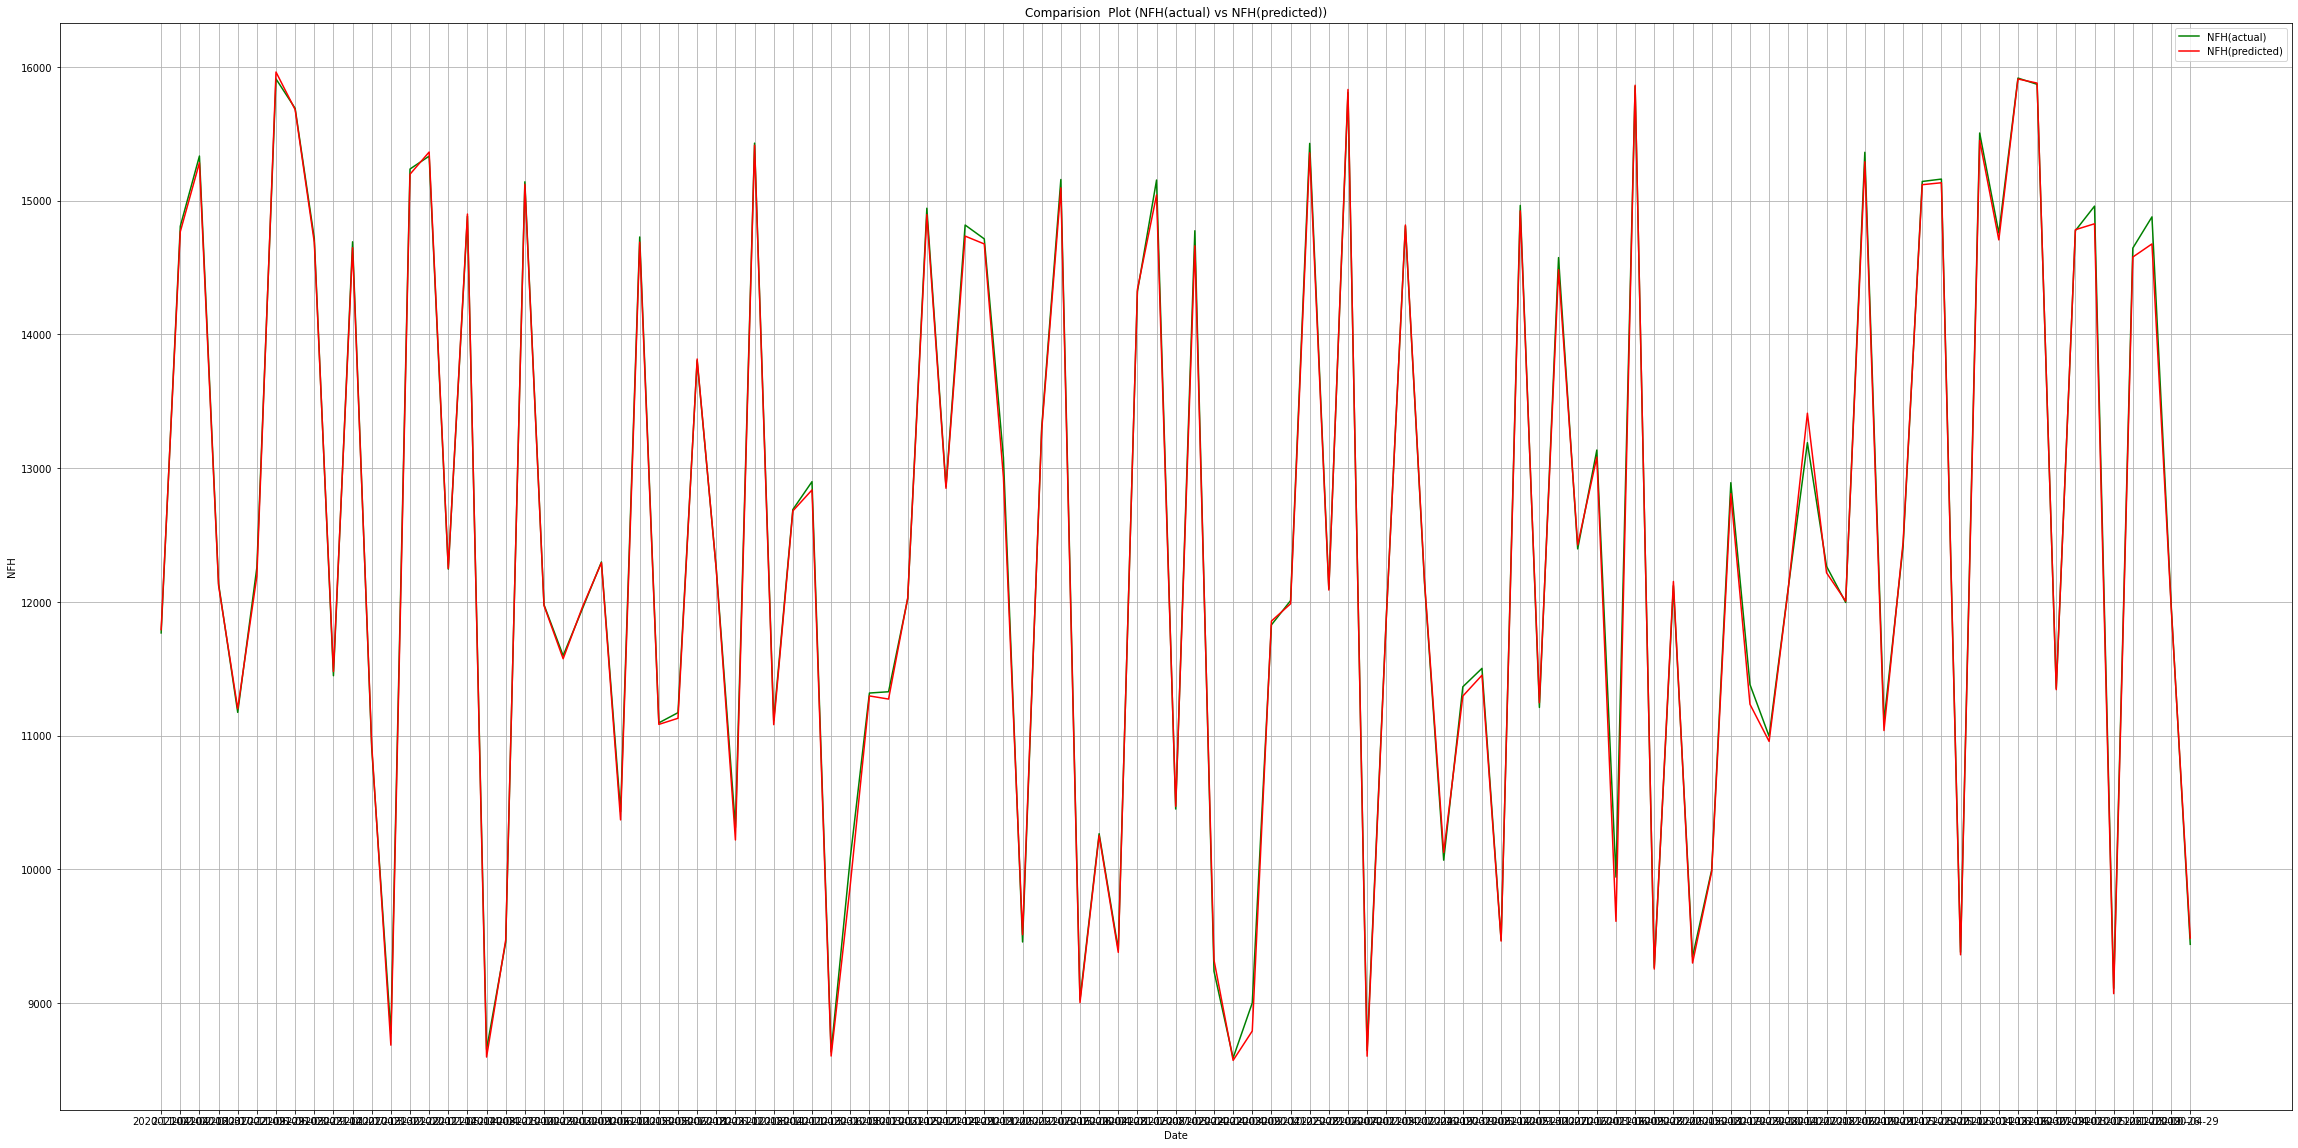

In [ ]:
plt.figure(figsize=(40,20))
plt.plot(date,y_test,label='NFH(actual)',color='green')
plt.plot(date,yhat,label='NFH(predicted)',color='red')
plt.grid(True)
plt.title('Comparision  Plot (NFH(actual) vs NFH(predicted))')
plt.legend()
plt.xlabel('Date')
plt.ylabel('NFH')
plt.style.use('fivethirtyeight')
plt.show()


## **NFL Training/Prediction**

In [ ]:
df=Df.copy()

In [ ]:
df_permutated = df.sample(frac=1)

train_size = 0.7# 70%-train set and 30% -test set
train_end = int(len(df_permutated)*train_size)

df_train = df_permutated[:train_end]
df_test = df_permutated[train_end:]

In [ ]:
df_train=df_train.reset_index()
df_train.to_csv('train.csv')

In [ ]:
df_train=df_train.drop(columns=['index','Date(IST)'])

In [ ]:
df_train

,NFO,NFC,FIIB,FIIS,FIIN,DIIB,DIIS,DIIN,August,December,CAD,DAD,DOD,NDAD,Currey,Flow,Shine,Vega,nfh,nfl
0,15076.552057,15088.488792,8149.80,8078.76,71.04,4723.27,5599.33,-876.06,942.0,1010.0,0.03,0.6223,-0.29,2.52,-0.1650,-0.3586,0.22,-1.510000,15162.051273,15040.964495
1,15779.561555,15764.328641,6811.49,6997.95,-186.46,5644.06,4660.09,983.97,1418.0,637.0,0.63,0.0671,-1.13,-1.33,-0.0645,-0.0500,-0.05,0.000000,15808.312533,15703.604362
2,10750.988956,10855.087906,4960.30,3250.33,1709.97,3306.19,4828.18,-1521.99,1140.0,784.0,-0.89,0.3000,-1.37,2.86,-0.1462,0.0069,0.78,-1.220001,10901.390987,10706.541196
3,8875.641901,8334.868732,6766.44,11389.37,-4622.93,8692.51,4325.08,4367.43,401.0,1515.0,4.47,0.2250,1.68,-3.57,0.2365,0.9027,0.20,-4.449997,8956.756976,8254.261372
4,13851.124616,13591.117913,10168.32,8674.09,1494.23,6603.46,6693.92,-90.46,1348.0,607.0,0.21,0.4879,0.85,3.34,0.3544,0.4000,0.17,-2.850000,13879.787317,13545.923722
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,8960.015080,9028.775555,4404.88,5758.78,-1353.90,4164.03,4508.19,-344.16,667.0,1103.0,0.13,0.0590,0.30,1.35,0.4015,-0.2143,0.06,-1.370001,9093.216220,8940.828990
244,12268.092675,12250.917868,5254.68,5431.11,-176.43,4286.22,4612.44,-326.22,737.0,1097.0,0.07,-0.0150,-1.73,-0.11,-0.0619,-0.4468,-0.06,0.059999,12305.506178,12240.410009
245,11559.195000,11562.593097,19932.30,19727.15,205.15,6248.89,6349.72,-100.83,798.0,1050.0,0.38,-0.2085,-0.60,-1.99,-0.0500,-0.0563,-0.25,-0.629999,11612.668279,11522.809686
246,12115.673242,12216.272367,2670.78,1982.02,688.76,3490.16,3426.21,63.95,1356.0,482.0,-0.01,0.3970,-0.98,0.72,-0.0520,0.0399,-0.10,-1.309999,12177.119957,12151.571552


In [ ]:
X_train=df_train.iloc[:,:-1].values
y_train=df_train.iloc[:,-1].values
X_train = np.asarray(X_train).astype(np.float32)
y_train =np.array(y_train).astype(np.float32)

In [ ]:
df_test=df_test.reset_index()
df_test.to_csv('test.csv')

In [ ]:
date=df_test['Date(IST)']
df_test=df_test.drop(columns=['index','Date(IST)'])

#### **Replacing columns of NFH with predicted values of NFH for NFL analysis**

In [ ]:
nfh=df_test.iloc[:,19]
df_test.iloc[:,19]=yhat

In [ ]:
df_test

,NFO,NFC,FIIB,FIIS,FIIN,DIIB,DIIS,DIIN,August,December,CAD,DAD,DOD,NDAD,Currey,Flow,Shine,Vega,nfh,nfl
0,11892.974083,11855.629646,6335.73,4750.66,1585.07,2928.16,4561.39,-1633.23,976.0,883.0,0.50,0.2200,0.50,1.51,0.1220,0.1651,0.05,0.170000,11915.664497,11793.170898
1,14565.794203,14363.966440,6317.00,6367.13,-50.13,5876.74,4173.60,1703.14,1157.0,769.0,1.43,0.3335,0.75,4.15,-0.0400,0.6500,0.27,-0.949999,14584.634999,14768.866211
2,8115.984581,8026.316532,6766.44,11389.37,-4622.93,8692.51,4325.08,4367.43,1156.0,725.0,-2.06,0.0250,-0.68,-7.50,0.5330,-0.3427,-0.20,-5.959999,8476.763458,15284.633789
3,10477.183228,10540.191523,4111.43,3763.08,348.35,4205.92,3942.45,263.47,1160.0,771.0,0.10,0.4950,0.86,1.02,-0.1790,0.1416,0.34,0.260000,10574.081442,12122.587891
4,14164.398720,14265.023889,6733.28,7216.92,-483.64,5686.04,6066.45,-380.41,859.0,1121.0,3.26,0.4641,2.63,3.43,0.0209,0.0799,0.22,-0.270000,14272.101602,11201.408203
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,12043.724888,12035.767359,5797.32,4965.18,832.14,3029.17,4703.63,-1674.46,807.0,1077.0,-0.67,-0.6150,-0.70,0.00,0.1020,0.1857,-0.08,1.000000,12105.766782,9070.801758
103,15313.211185,15266.095839,5114.13,4872.53,241.60,3623.92,4062.51,-438.59,1244.0,737.0,0.66,-0.2333,0.53,1.14,-0.0510,0.1400,0.00,-1.480000,15340.916475,14579.087891
104,13757.199088,13782.121054,14649.69,11928.74,2720.95,4224.56,6649.17,-2424.61,751.0,1196.0,-1.32,-0.2250,1.83,0.10,-0.0465,0.1243,-0.32,-0.360001,13804.565739,14677.162109
105,9305.902820,9209.351767,6231.71,7893.74,-1662.03,5326.50,5690.50,-364.0,684.0,1103.0,-1.58,-0.2580,-0.11,-0.74,-0.6498,-0.1115,0.02,5.470001,9380.193595,11968.663086


In [ ]:
X_test=df_test.iloc[:,:-1].values
y_test=df_test.iloc[:,-1].values
X_test = np.asarray(X_test).astype(np.float32)
y_test =np.array(y_test).astype(np.float32)

### **Hyper tuning of Model for NFL training/Prediction**

In [ ]:
tuner1 = kt.BayesianOptimization(
    build_model,
    objective='val_loss',
    max_trials=7,
    executions_per_trial=2,
    directory=os.path.normpath('DM/NFL:/keras_tuning'),
    project_name='timeseries_bayes_opt_POC',
    overwrite=True)

In [ ]:
def tune_model1(X_train,y_train,y_test,X_test):
  tuner1.search(X_train, y_train, epochs=1000, validation_data=(X_test, y_test))
  bayes_opt_model_best_model = tuner1.get_best_models(num_models=1)
  model = bayes_opt_model_best_model[0]
  print("the best model is given by {}".format(model))
  model.fit(X_train, y_train, epochs=5, batch_size=250, verbose=0)
  return model

In [ ]:
model=tune_model1(X_train,y_train,y_test,X_test)

Trial 7 Complete [00h 02m 45s]
val_loss: 8183046.0

Best val_loss So Far: 8183046.0
Total elapsed time: 00h 16m 26s
INFO:tensorflow:Oracle triggered exit
the best model is given by <tensorflow.python.keras.engine.sequential.Sequential object at 0x7f178cd2e310>


### **Model Prediction**

In [ ]:
yhat = model.predict(X_test, verbose=0)

In [ ]:
yhat

array([[11628.107 ],
       [14261.833 ],
       [ 9033.257 ],
       [10767.725 ],
       [14315.032 ],
       [ 9316.357 ],
       [14738.695 ],
       [13082.632 ],
       [14153.281 ],
       [10198.2705],
       [11964.241 ],
       [10817.261 ],
       [15243.602 ],
       [11360.595 ],
       [14279.147 ],
       [16115.505 ],
       [11198.137 ],
       [15256.96  ],
       [13901.896 ],
       [14587.563 ],
       [11615.675 ],
       [ 9587.577 ],
       [11551.341 ],
       [15002.744 ],
       [14865.5205],
       [11394.244 ],
       [11409.515 ],
       [ 9663.855 ],
       [14750.917 ],
       [14335.995 ],
       [14976.109 ],
       [11058.258 ],
       [ 8510.8955],
       [15034.265 ],
       [14094.789 ],
       [11428.345 ],
       [10861.778 ],
       [11400.061 ],
       [ 8765.548 ],
       [14921.245 ],
       [15328.359 ],
       [11366.275 ],
       [11199.129 ],
       [12244.117 ],
       [15019.246 ],
       [12590.299 ],
       [10925.753 ],
       [ 9703

### **Model Evaluation**

In [ ]:
from sklearn.metrics import mean_squared_error
score=mean_squared_error(y_test, yhat)
print(score)

8227269.0


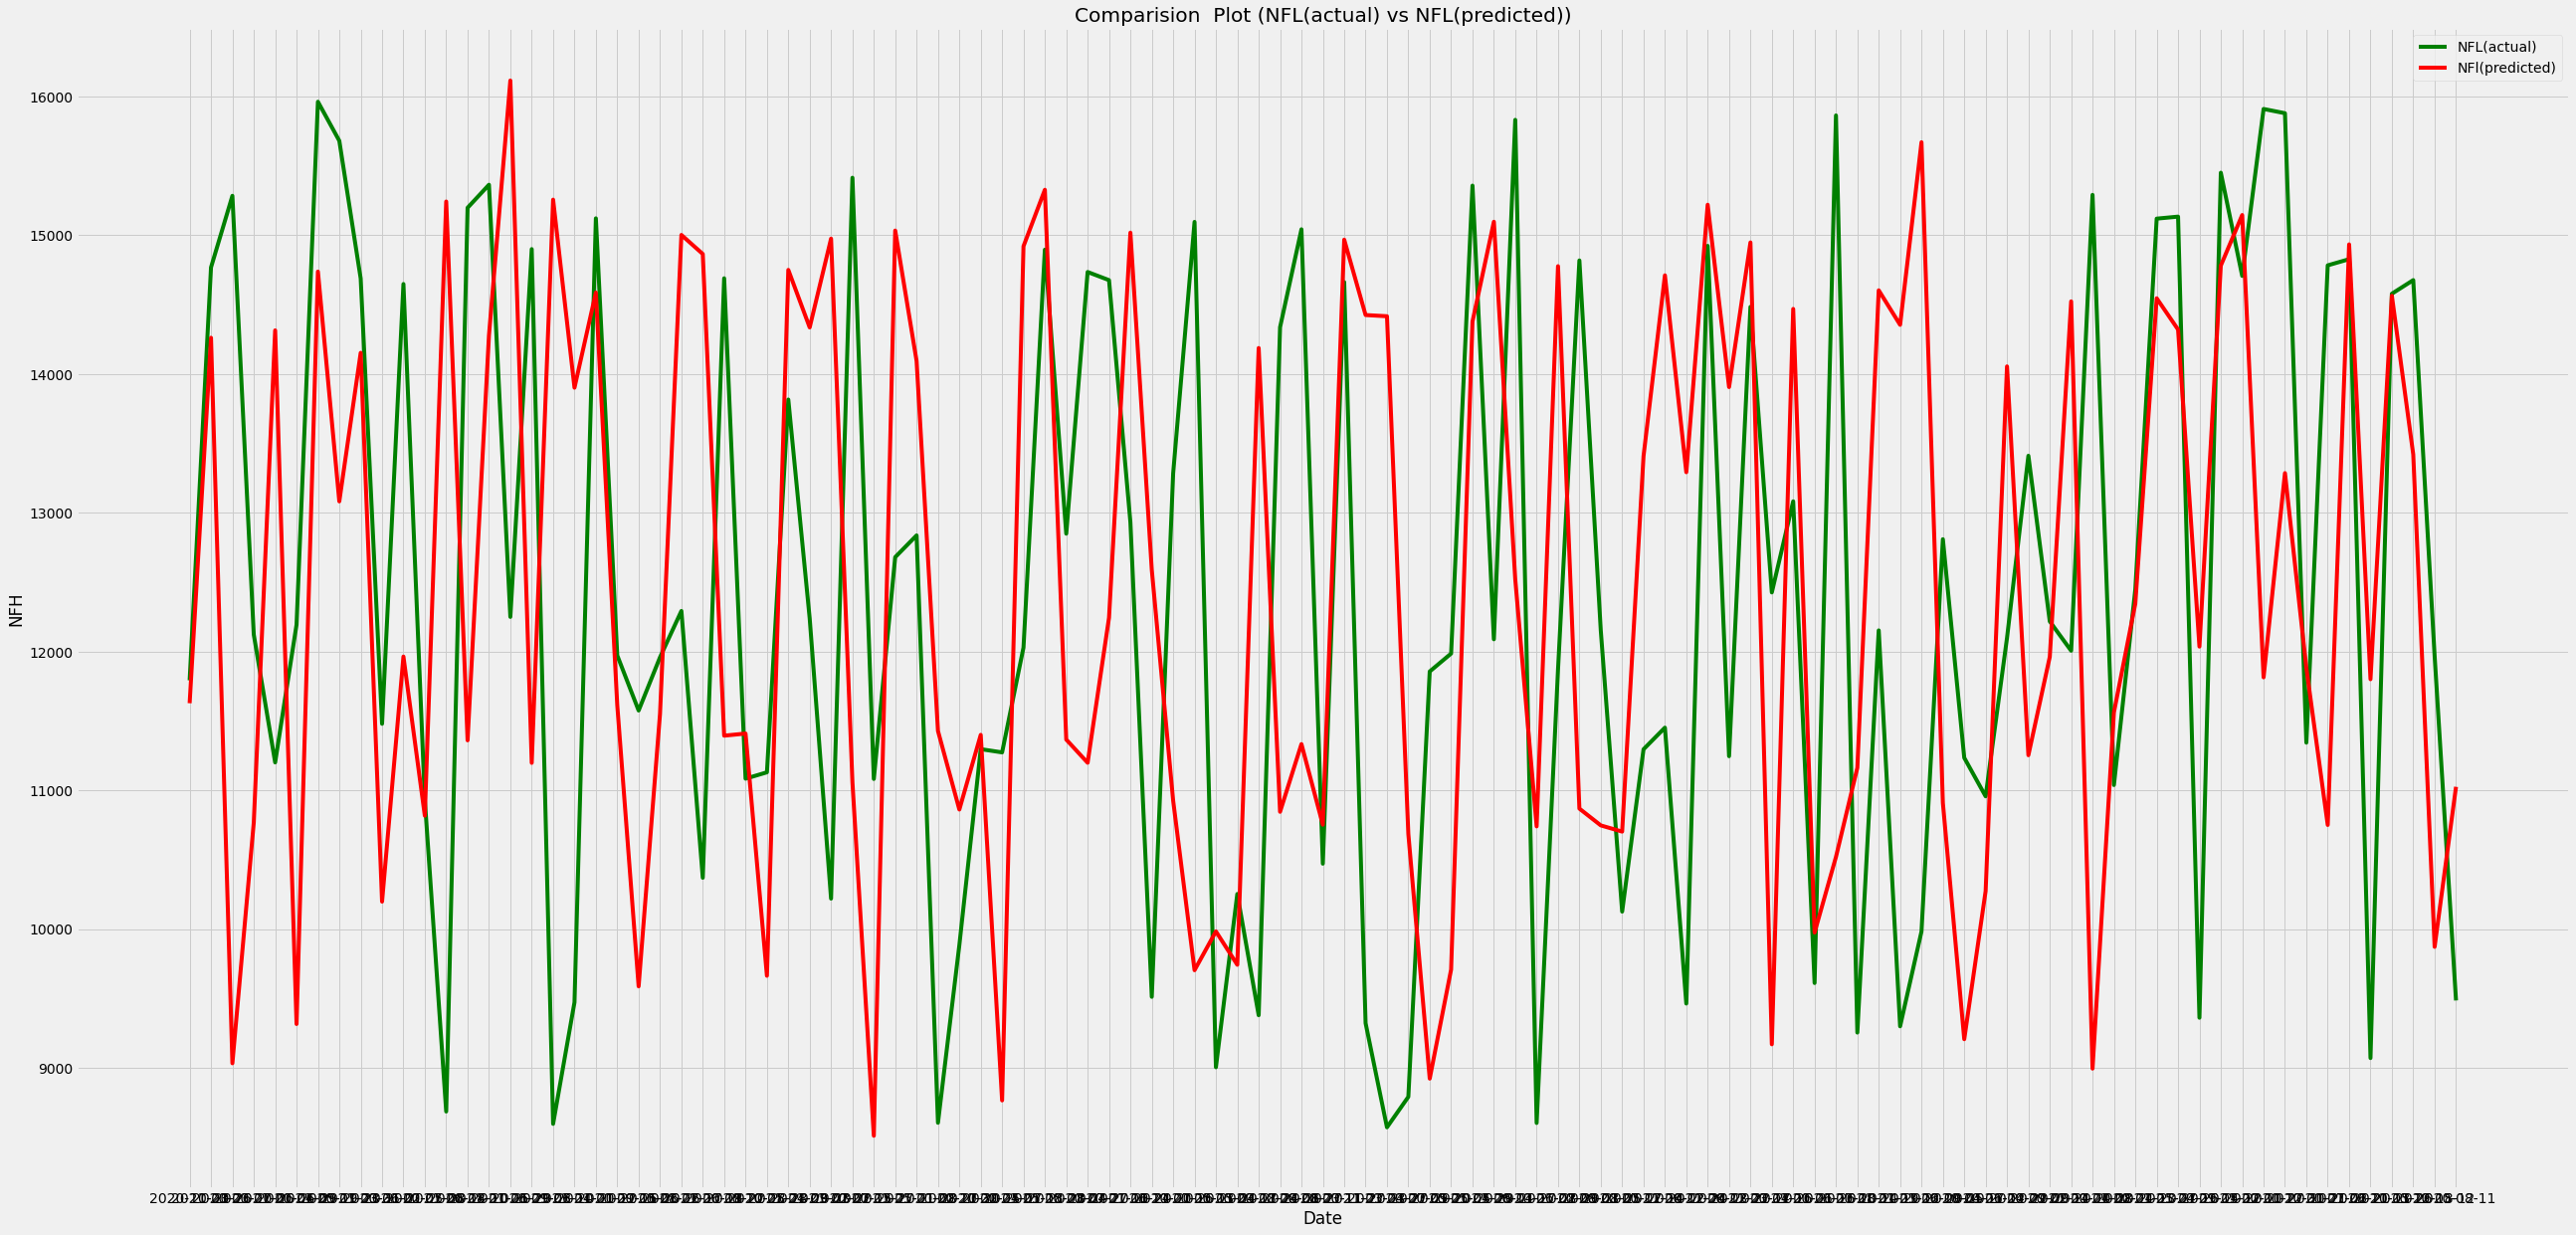

In [ ]:
plt.figure(figsize=(40,20))
plt.plot(date,y_test,label='NFL(actual)',color='green')
plt.plot(date,yhat,label='NFl(predicted)',color='red')
plt.grid(True)
plt.title('Comparision  Plot (NFL(actual) vs NFL(predicted))')
plt.legend()
plt.xlabel('Date')
plt.ylabel('NFH')
plt.style.use('fivethirtyeight')
plt.show()


## **Independent Model Analysis**



### **NFH Training/Prediction**

In [ ]:
df=pd.read_csv('csv_nfl_data.csv')
df=process(df)
df


,Date(IST),NFO,NFC,FIIB,FIIS,FIIN,DIIB,DIIS,DIIN,August,December,CAD,DAD,DOD,NDAD,Currey,Flow,Shine,Vega,nfh,nfl
1,2020-01-02,12115.673242,12216.272367,2670.78,1982.02,688.76,3490.16,3426.21,63.95,1356.0,482.0,-0.01,0.3970,-0.98,0.72,-0.0520,0.0399,-0.10,-1.309999,12177.119957,12151.571552
2,2020-01-03,12195.406448,12251.196928,4514.35,3251.30,1263.05,2750.87,3780.07,-1029.2,879.0,973.0,-0.23,-0.5100,-1.33,0.46,0.4430,0.5648,0.08,1.550000,12275.487382,12173.355954
3,2020-01-06,12272.929018,12228.903255,3732.00,3835.84,-103.84,3778.78,3802.48,-23.7,360.0,1502.0,-0.17,0.0150,-0.21,-0.07,0.0877,-0.0690,-0.18,-0.170000,12299.127043,12181.887534
4,2020-01-07,12237.309351,12051.960005,3911.17,4593.40,-682.23,4205.16,3893.97,311.19,1248.0,578.0,-0.21,-0.0500,-0.02,-1.79,-0.0437,-0.0208,0.08,-0.060000,12242.227141,12030.371144
5,2020-01-08,12149.137851,12017.343536,4109.04,4624.89,-515.85,5162.02,4413.62,748.4,725.0,1109.0,0.56,0.3050,0.54,-0.59,-0.2980,-0.6992,-0.65,-0.340000,12192.474725,11985.555622
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,2021-06-24,15832.780716,15711.203010,7094.36,9985.30,-2890.94,5377.76,4239.00,1138.76,783.0,1186.0,0.67,0.2234,-0.04,-0.16,0.0900,0.0880,0.01,-0.349999,15871.734957,15673.598435
353,2021-06-25,15781.799179,15763.679655,6766.31,7445.15,-678.84,6844.01,5011.25,1832.76,1070.0,902.0,0.54,0.1000,0.18,0.27,-0.0515,0.1500,-0.08,-0.350000,15846.875708,15703.024907
354,2021-06-28,15829.576703,15838.276361,4275.71,5934.43,-1658.72,5634.19,4357.11,1277.08,1069.0,940.0,-0.90,-0.1242,-0.39,-0.96,0.1515,-0.3200,-0.19,0.140000,15869.452759,15764.937429
355,2021-06-29,15904.676773,15837.898386,10932.02,10815.39,116.63,8687.31,6877.26,1810.05,903.0,1084.0,-0.52,-0.3158,0.08,-0.26,0.0040,0.2000,-0.17,0.260000,15910.968841,15804.933350


In [ ]:
Df=df.copy()
df=df.drop(columns=['nfl'])
df


,Date(IST),NFO,NFC,FIIB,FIIS,FIIN,DIIB,DIIS,DIIN,August,December,CAD,DAD,DOD,NDAD,Currey,Flow,Shine,Vega,nfh
1,2020-01-02,12115.673242,12216.272367,2670.78,1982.02,688.76,3490.16,3426.21,63.95,1356.0,482.0,-0.01,0.3970,-0.98,0.72,-0.0520,0.0399,-0.10,-1.309999,12177.119957
2,2020-01-03,12195.406448,12251.196928,4514.35,3251.30,1263.05,2750.87,3780.07,-1029.2,879.0,973.0,-0.23,-0.5100,-1.33,0.46,0.4430,0.5648,0.08,1.550000,12275.487382
3,2020-01-06,12272.929018,12228.903255,3732.00,3835.84,-103.84,3778.78,3802.48,-23.7,360.0,1502.0,-0.17,0.0150,-0.21,-0.07,0.0877,-0.0690,-0.18,-0.170000,12299.127043
4,2020-01-07,12237.309351,12051.960005,3911.17,4593.40,-682.23,4205.16,3893.97,311.19,1248.0,578.0,-0.21,-0.0500,-0.02,-1.79,-0.0437,-0.0208,0.08,-0.060000,12242.227141
5,2020-01-08,12149.137851,12017.343536,4109.04,4624.89,-515.85,5162.02,4413.62,748.4,725.0,1109.0,0.56,0.3050,0.54,-0.59,-0.2980,-0.6992,-0.65,-0.340000,12192.474725
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,2021-06-24,15832.780716,15711.203010,7094.36,9985.30,-2890.94,5377.76,4239.00,1138.76,783.0,1186.0,0.67,0.2234,-0.04,-0.16,0.0900,0.0880,0.01,-0.349999,15871.734957
353,2021-06-25,15781.799179,15763.679655,6766.31,7445.15,-678.84,6844.01,5011.25,1832.76,1070.0,902.0,0.54,0.1000,0.18,0.27,-0.0515,0.1500,-0.08,-0.350000,15846.875708
354,2021-06-28,15829.576703,15838.276361,4275.71,5934.43,-1658.72,5634.19,4357.11,1277.08,1069.0,940.0,-0.90,-0.1242,-0.39,-0.96,0.1515,-0.3200,-0.19,0.140000,15869.452759
355,2021-06-29,15904.676773,15837.898386,10932.02,10815.39,116.63,8687.31,6877.26,1810.05,903.0,1084.0,-0.52,-0.3158,0.08,-0.26,0.0040,0.2000,-0.17,0.260000,15910.968841


### **Train/Test Split**

In [ ]:
df_permutated = df.sample(frac=1)

train_size = 0.7# 70%-train set and 30% -test set
train_end = int(len(df_permutated)*train_size)

df_train = df_permutated[:train_end]
df_test = df_permutated[train_end:]

In [ ]:
df_train=df_train.reset_index()
df_train.to_csv('train.csv')


In [ ]:
df_train=df_train.drop(columns=['index','Date(IST)'])

In [ ]:
df_train

,NFO,NFC,FIIB,FIIS,FIIN,DIIB,DIIS,DIIN,August,December,CAD,DAD,DOD,NDAD,Currey,Flow,Shine,Vega,nfh
0,10192.857077,10036.042666,3579.73,4891.22,-1311.49,5251.66,3306.51,1945.15,952.0,910.0,1.09,0.2500,1.97,1.90,0.0439,0.1996,-0.24,-4.700001,10219.364632
1,11283.498125,11351.616319,4934.93,4475.92,459.01,3595.59,3692.72,-97.13,1214.0,665.0,0.19,-0.0550,-0.07,-0.18,0.2060,0.0300,-1.06,1.030001,11381.738836
2,12827.587996,12870.341675,14689.87,9784.52,4905.35,3076.21,6905.37,-3829.16,1058.0,853.0,1.36,0.0616,2.51,-1.49,-0.1700,0.3331,-0.52,-0.390001,12891.760131
3,10832.924632,10852.958037,5473.24,6468.11,-994.87,3721.81,4575.22,-853.41,812.0,1107.0,-0.39,0.0680,-1.34,1.23,0.1137,0.1900,0.70,-1.350000,10869.196657
4,15313.211185,15266.095839,5114.13,4872.53,241.60,3623.92,4062.51,-438.59,1244.0,737.0,0.66,-0.2333,0.53,1.14,-0.0510,0.1400,0.00,-1.480000,15340.916475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,13161.280072,13154.533268,14473.15,10835.73,3637.42,4693.02,6132.76,-1439.74,1393.0,568.0,-0.13,-0.0450,0.40,-4.46,0.1010,0.1513,-0.35,0.110001,13177.426205
244,11274.188212,11100.548728,6301.62,8187.31,-1885.69,7839.03,7650.39,188.64,303.0,1574.0,0.85,0.0562,-0.33,1.57,0.3853,0.1727,0.51,-0.070000,11267.291405
245,14737.177164,14810.702801,8752.01,8641.16,110.85,4854.39,4301.61,552.78,1242.0,707.0,0.34,0.0881,-0.80,2.74,0.2255,-0.0040,0.49,-0.209999,14863.803531
246,11595.460247,11538.238776,5230.50,5770.31,-539.81,4333.23,4851.18,-517.95,294.0,1639.0,-1.73,-1.3015,-2.46,-0.40,0.0020,-0.3487,-0.70,1.950001,11609.162107


In [ ]:
X_train=df_train.iloc[:,:-1].values
y_train=df_train.iloc[:,-1].values
X_train = np.asarray(X_train).astype(np.float32)
y_train =np.array(y_train).astype(np.float32)

In [ ]:
df_test=df_test.reset_index()
df_test.to_csv('test.csv')

In [ ]:
date=df_test['Date(IST)']
df_test=df_test.drop(columns=['index','Date(IST)'])

In [ ]:
df_test

,NFO,NFC,FIIB,FIIS,FIIN,DIIB,DIIS,DIIN,August,December,CAD,DAD,DOD,NDAD,Currey,Flow,Shine,Vega,nfh
0,14667.673327,14740.925729,5577.51,7529.41,-1951.90,5581.34,4968.54,612.8,441.0,1492.0,-0.15,-0.0750,1.29,-0.24,0.0665,0.8800,-0.08,0.900002,14783.480939
1,13124.071523,13108.175126,9295.46,8938.11,357.35,3377.19,5013.16,-1635.97,1096.0,796.0,0.64,-0.0250,-0.33,-0.55,0.2151,0.1487,0.13,0.400000,13168.988803
2,9689.120857,9843.973555,12157.10,4658.78,7498.29,5065.90,4624.85,441.05,1382.0,459.0,-0.14,0.3210,1.99,0.36,-0.5416,1.3600,-0.83,-1.389999,9904.392435
3,11540.002607,11561.064950,6625.39,5461.07,1164.32,3339.96,4149.23,-809.27,951.0,934.0,0.84,-0.4150,-0.18,-0.69,-0.3000,-0.1549,-0.79,1.199999,11580.673879
4,11277.821031,11230.556495,5836.36,5590.41,245.95,3990.80,5008.20,-1017.4,930.0,939.0,-0.93,-0.1250,-1.38,-2.38,0.1215,-0.1846,-0.32,0.700001,11300.264384
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,10766.555851,10653.585108,4489.16,5580.24,-1091.08,5544.60,3884.69,1659.91,758.0,1115.0,-0.18,-0.0700,0.50,0.19,0.0046,-0.1600,-0.40,0.240000,10853.170934
103,14720.272745,14837.949916,14123.81,13935.73,188.08,5174.63,5921.20,-746.57,1258.0,677.0,-1.04,-0.4575,-2.34,-1.67,0.3150,-0.0200,-0.65,7.549999,14932.588713
104,10871.074643,10874.718627,2489.45,3520.45,-1031.00,2777.56,3208.77,-431.21,618.0,1268.0,1.42,0.2550,1.32,2.08,0.0591,0.2600,-0.48,-1.969999,10927.449786
105,13757.199088,13782.121054,14649.69,11928.74,2720.95,4224.56,6649.17,-2424.61,751.0,1196.0,-1.32,-0.2250,1.83,0.10,-0.0465,0.1243,-0.32,-0.360001,13804.565739


In [ ]:
X_test=df_test.iloc[:,:-1].values
y_test=df_test.iloc[:,-1].values
X_test = np.asarray(X_test).astype(np.float32)
y_test =np.array(y_test).astype(np.float32)

### **Hyper tuning of Model for NFH training/Prediction**

In [ ]:
tuner2 = kt.BayesianOptimization(
    build_model,
    objective='val_loss',
    max_trials=7,
    executions_per_trial=2,
    directory=os.path.normpath('IDM/NFH:/keras_tuning'),
    project_name='timeseries_bayes_opt_POC',
    overwrite=True)

In [ ]:
def tune_model2(X_train,y_train,y_test,X_test):
  tuner2.search(X_train, y_train, epochs=1000, validation_data=(X_test, y_test))
  bayes_opt_model_best_model = tuner2.get_best_models(num_models=1)
  model = bayes_opt_model_best_model[0]
  print("the best model is given by {}".format(model))
  model.fit(X_train, y_train, epochs=5, batch_size=250, verbose=0)
  return model

In [ ]:
model=tune_model2(X_train,y_train,y_test,X_test)

Trial 7 Complete [00h 02m 16s]
val_loss: 8749.71875

Best val_loss So Far: 8268.611328125
Total elapsed time: 00h 17m 39s
INFO:tensorflow:Oracle triggered exit
the best model is given by <tensorflow.python.keras.engine.sequential.Sequential object at 0x7f178bfd32d0>


### **Model Prediction**

In [ ]:
yhat = model.predict(X_test, verbose=0)

In [ ]:
yhat

array([[14874.363 ],
       [13269.942 ],
       [ 9916.057 ],
       [11691.755 ],
       [11407.024 ],
       [11163.574 ],
       [ 8338.438 ],
       [14803.944 ],
       [11713.82  ],
       [11446.148 ],
       [12292.967 ],
       [14145.841 ],
       [11310.363 ],
       [11398.533 ],
       [14800.184 ],
       [ 9445.891 ],
       [12023.037 ],
       [13348.26  ],
       [ 9381.919 ],
       [11690.741 ],
       [11579.218 ],
       [ 8680.136 ],
       [ 8665.024 ],
       [10980.387 ],
       [11329.061 ],
       [15178.122 ],
       [11569.24  ],
       [ 9606.435 ],
       [15030.793 ],
       [12306.46  ],
       [11423.919 ],
       [14199.795 ],
       [14182.976 ],
       [11103.674 ],
       [15381.554 ],
       [14966.121 ],
       [12197.719 ],
       [11958.788 ],
       [11762.617 ],
       [15940.69  ],
       [11930.392 ],
       [10745.702 ],
       [11458.12  ],
       [11454.956 ],
       [13820.8125],
       [11983.216 ],
       [14697.94  ],
       [12083

### **Model Evaluation**

In [ ]:
from sklearn.metrics import mean_squared_error
score=mean_squared_error(y_test, yhat)
print(score)

14861.785


### **Data Visualization**

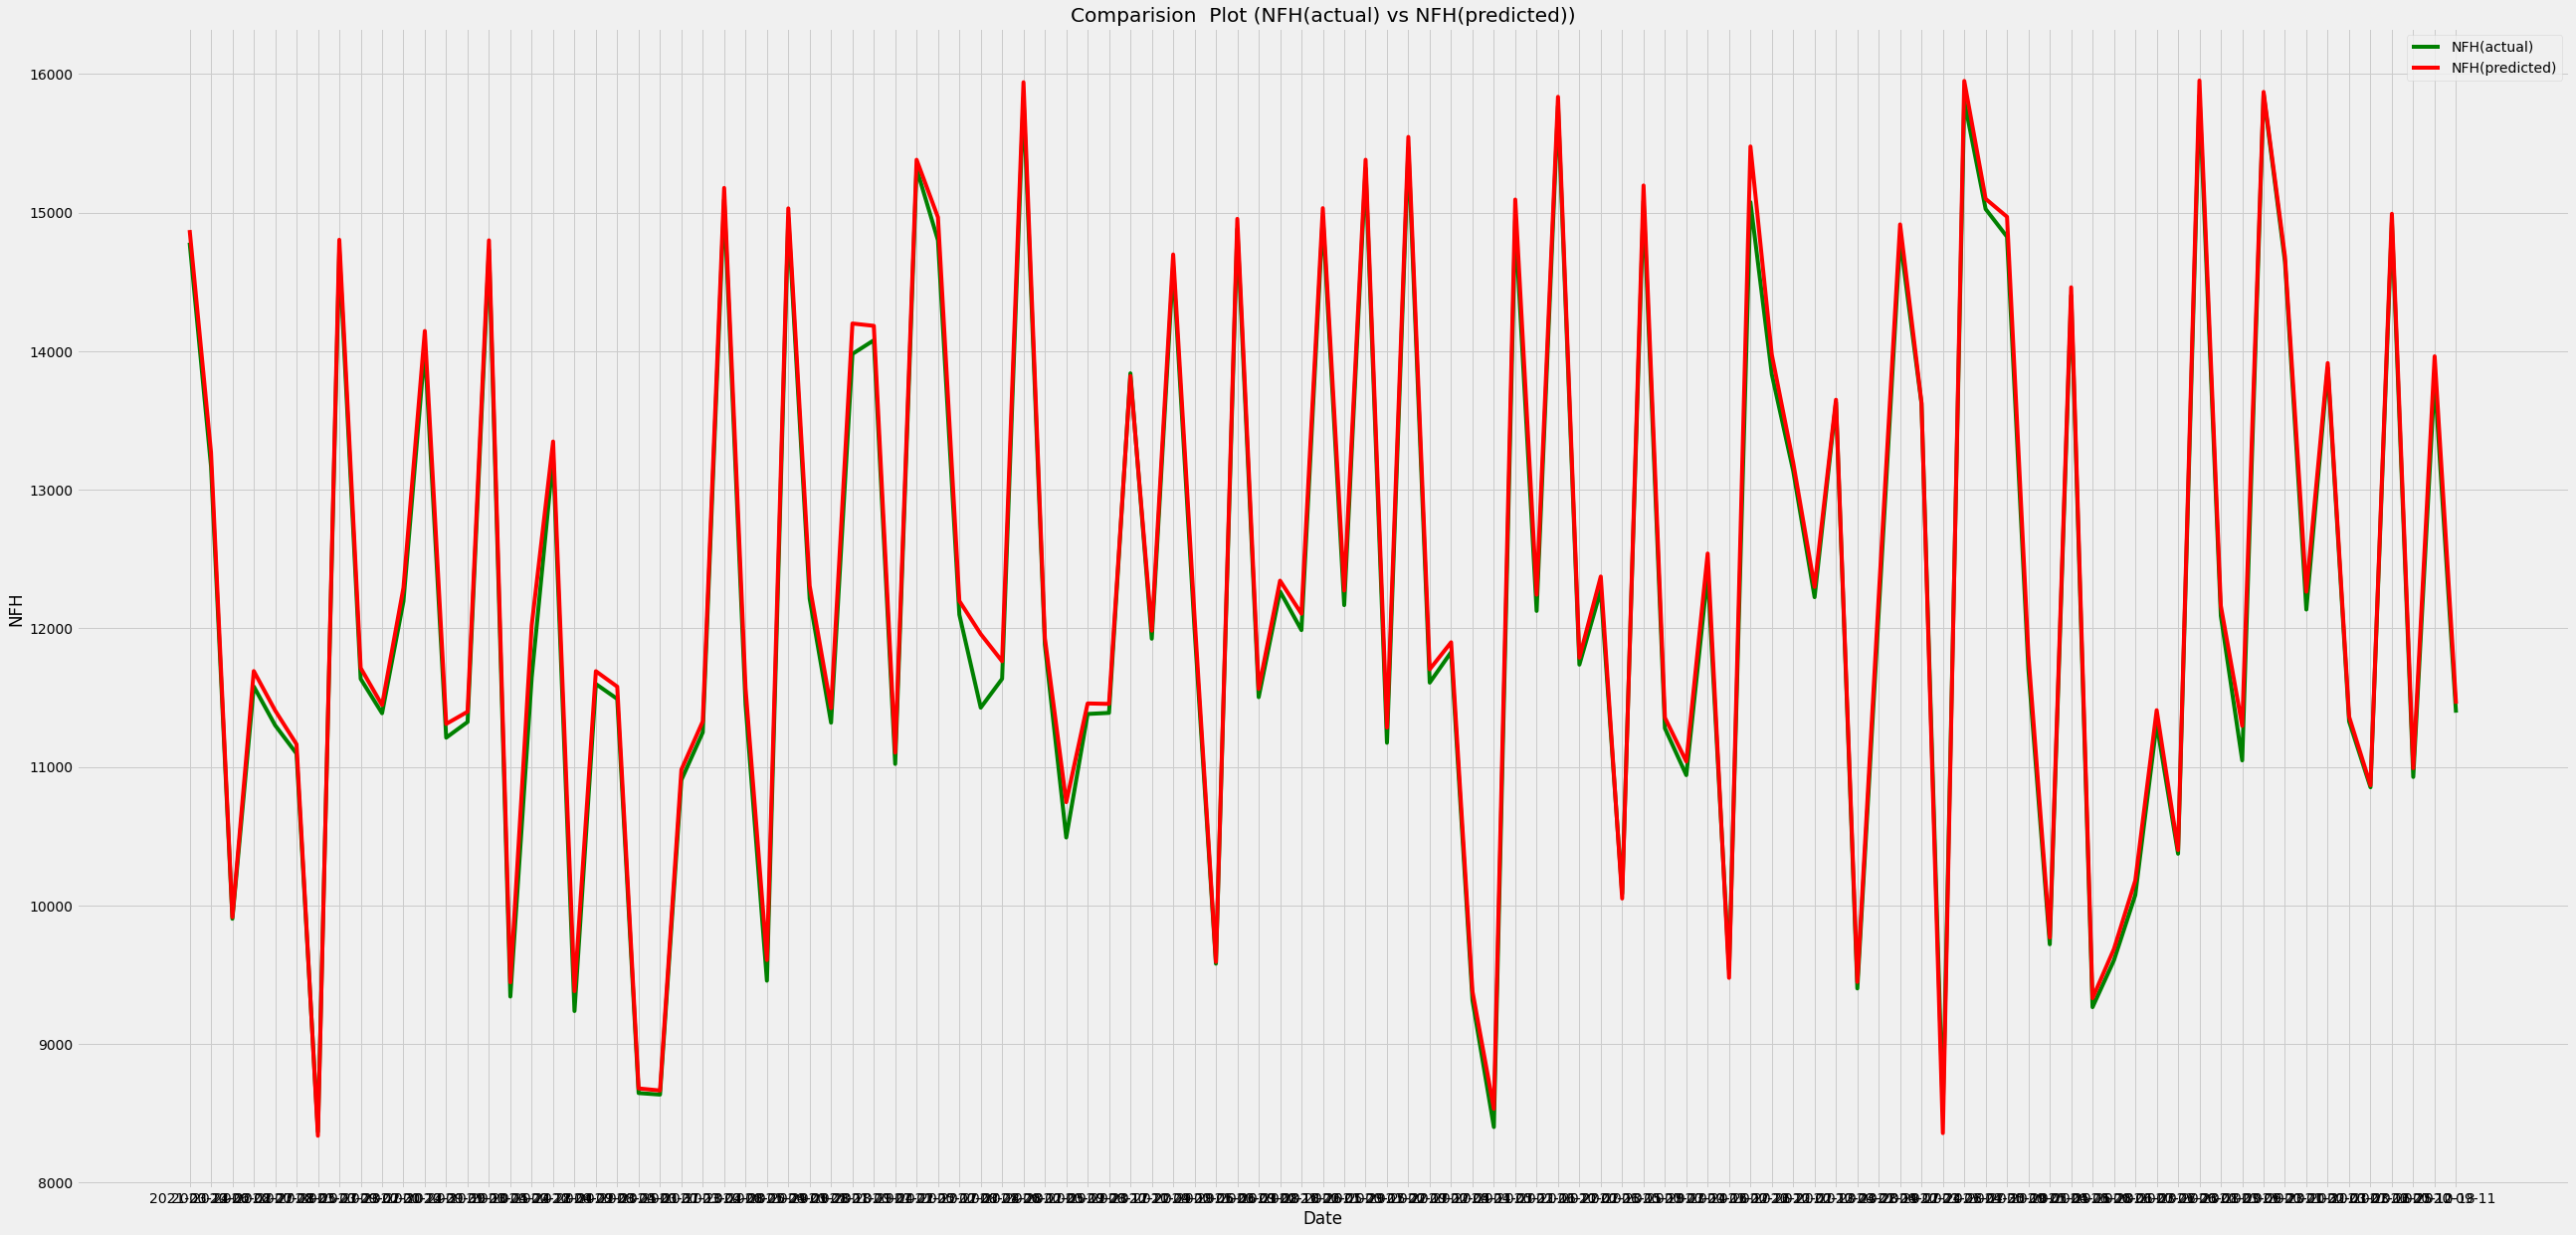

In [ ]:
plt.figure(figsize=(40,20))
plt.plot(date,y_test,label='NFH(actual)',color='green')
plt.plot(date,yhat,label='NFH(predicted)',color='red')
plt.grid(True)
plt.title('Comparision  Plot (NFH(actual) vs NFH(predicted))')
plt.legend()
plt.xlabel('Date')
plt.ylabel('NFH')
plt.style.use('fivethirtyeight')
plt.show()


### **NFL Training/Prediction**

In [ ]:
df=Df.copy()

In [ ]:
df['dum']=0
df['NFL']=df['nfl']
df=df.drop(columns=['nfl'])

### **Train/Test Split**

In [ ]:
df_permutated = df.sample(frac=1)

train_size = 0.7# 70%-train set and 30% -test set
train_end = int(len(df_permutated)*train_size)

df_train = df_permutated[:train_end]
df_test = df_permutated[train_end:]

In [ ]:
df_train=df_train.reset_index()
df_train.to_csv('train.csv')

In [ ]:
df_train=df_train.drop(columns=['index','Date(IST)','nfh'])

In [ ]:
df_train

,NFO,NFC,FIIB,FIIS,FIIN,DIIB,DIIS,DIIN,August,December,CAD,DAD,DOD,NDAD,Currey,Flow,Shine,Vega,dum,NFL
0,11550.757176,11341.676300,3805.95,5878.71,-2072.76,4963.84,4084.93,878.91,413.0,1476.0,-0.10,0.1340,-0.11,1.27,-0.0550,-0.0263,0.23,-0.920000,0,11307.615257
1,9689.120857,9843.973555,12157.10,4658.78,7498.29,5065.90,4624.85,441.05,1382.0,459.0,-0.14,0.3210,1.99,0.36,-0.5416,1.3600,-0.83,-1.389999,0,9677.174985
2,11881.568902,11798.714304,5994.22,4337.44,1656.78,3278.52,4900.25,-1621.73,1077.0,798.0,-0.49,-0.5550,-0.46,-1.39,-0.0360,-0.0220,-0.55,1.770000,0,11720.228503
3,13165.635549,12977.585277,74741.85,67028.87,7712.98,4875.77,9844.67,-4968.9,1212.0,686.0,-1.05,0.2767,-1.03,-0.21,0.2563,-0.0850,-0.14,-0.410000,0,12939.434514
4,14864.540986,14918.766501,5312.00,6572.59,-1260.59,5372.26,6076.62,-704.36,887.0,1089.0,-0.38,-0.3306,-0.97,-1.37,0.1215,0.0850,-0.42,5.750000,0,14854.490800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,11746.523368,11747.472191,7504.47,7138.26,366.21,4216.53,3614.67,601.86,1262.0,558.0,0.22,0.4350,1.31,0.88,-0.1840,-0.0798,-0.26,-1.920000,0,11680.655706
244,15175.649346,15165.682933,12080.56,13023.16,-942.60,4789.89,4953.76,-163.87,786.0,1174.0,1.00,0.2300,0.25,-0.13,-0.1720,0.3000,0.20,-1.869999,0,15077.566100
245,11366.599938,11367.116960,3975.11,3564.95,410.16,4277.43,4528.08,-250.65,1214.0,679.0,-0.22,-0.3650,-0.10,-0.54,-0.1390,-0.1790,-0.64,-0.179998,0,11337.643978
246,12122.018804,12032.211552,5142.69,9321.81,-4179.12,7024.62,3208.18,3816.44,670.0,1127.0,-0.35,-0.6050,-2.40,0.50,-0.0246,-0.2982,0.08,3.350000,0,12010.568565


In [ ]:
X_train=df_train.iloc[:,:-1].values
y_train=df_train.iloc[:,-1].values
X_train = np.asarray(X_train).astype(np.float32)
y_train =np.array(y_train).astype(np.float32)

In [ ]:
df_test=df_test.reset_index()
df_test.to_csv('test.csv')

In [ ]:
date=df_test['Date(IST)']
df_test=df_test.drop(columns=['index','Date(IST)','nfh'])

In [ ]:
df_test

,NFO,NFC,FIIB,FIIS,FIIN,DIIB,DIIS,DIIN,August,December,CAD,DAD,DOD,NDAD,Currey,Flow,Shine,Vega,dum,NFL
0,11682.806160,11734.210465,6302.82,6156.60,146.22,4428.91,4437.04,-8.13,966.0,872.0,-2.180,0.3415,-2.28,4.39,-0.1905,0.2865,-0.36,-5.980000,0,11634.129662
1,13161.280072,13154.533268,14473.15,10835.73,3637.42,4693.02,6132.76,-1439.74,1393.0,568.0,-0.130,-0.0450,0.40,-4.46,0.1010,0.1513,-0.35,0.110001,0,13025.140357
2,9264.595428,9211.953806,5383.01,4848.14,534.87,3799.19,4620.79,-821.6,859.0,968.0,-0.360,0.3090,1.05,1.91,-0.0037,0.3180,-1.24,-3.870001,0,9164.428481
3,10433.636457,10419.371003,3964.64,5901.70,-1937.06,4337.18,3301.05,1036.13,713.0,1210.0,1.195,0.1200,1.18,1.73,-0.1230,0.3768,0.26,-2.949999,0,10358.477776
4,14689.155319,14666.101429,10175.47,9098.85,1076.62,5772.80,5960.90,-188.1,912.0,1022.0,0.230,0.0968,-0.38,-0.36,0.0505,0.1800,0.08,1.040001,0,14538.063435
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,14586.023581,14741.510449,11826.54,9889.80,1936.74,6314.21,7082.76,-768.55,1212.0,705.0,0.950,-0.0550,0.99,1.41,0.0897,0.1392,-0.35,-1.139999,0,14465.335444
103,14164.398720,14265.023889,6733.28,7216.92,-483.64,5686.04,6066.45,-380.41,859.0,1121.0,3.260,0.4641,2.63,3.43,0.0209,0.0799,0.22,-0.270000,0,14117.719815
104,9944.652531,9885.864632,4910.75,5397.37,-486.62,3759.97,3591.92,168.05,1027.0,838.0,-1.710,-0.1850,-1.08,-0.40,0.0275,-0.0900,-0.13,-0.199997,0,9688.706395
105,12392.260613,12390.792053,6609.58,6345.32,264.26,3615.43,4115.60,-500.17,946.0,886.0,-0.100,-0.1400,0.86,1.00,0.1145,0.0681,-0.14,-0.219999,0,12346.145396


In [ ]:
X_test=df_test.iloc[:,:-1].values
y_test=df_test.iloc[:,-1].values
X_test = np.asarray(X_test).astype(np.float32)
y_test =np.array(y_test).astype(np.float32)

In [ ]:
X_train

array([[ 1.1550757e+04,  1.1341677e+04,  3.8059500e+03, ...,
         2.3000000e-01, -9.2000008e-01,  0.0000000e+00],
       [ 9.6891211e+03,  9.8439736e+03,  1.2157100e+04, ...,
        -8.2999998e-01, -1.3899994e+00,  0.0000000e+00],
       [ 1.1881569e+04,  1.1798714e+04,  5.9942202e+03, ...,
        -5.5000001e-01,  1.7700005e+00,  0.0000000e+00],
       ...,
       [ 1.1366600e+04,  1.1367117e+04,  3.9751101e+03, ...,
        -6.3999999e-01, -1.7999840e-01,  0.0000000e+00],
       [ 1.2122019e+04,  1.2032212e+04,  5.1426899e+03, ...,
         7.9999998e-02,  3.3500004e+00,  0.0000000e+00],
       [ 1.4688951e+04,  1.4612127e+04,  6.3266201e+03, ...,
         1.3000000e+00, -7.6000023e-01,  0.0000000e+00]], dtype=float32)

### **Hyper tuning of Model for NFL training/Prediction**

In [ ]:
tuner3 = kt.BayesianOptimization(
    build_model,
    objective='val_loss',
    max_trials=7,
    executions_per_trial=2,
    directory=os.path.normpath('IDM/NFL:/keras_tuning'),
    project_name='timeseries_bayes_opt_POC',
    overwrite=True)

In [ ]:
def tune_model3(X_train,y_train,y_test,X_test):
  tuner3.search(X_train, y_train, epochs=1000, validation_data=(X_test, y_test))
  bayes_opt_model_best_model = tuner1.get_best_models(num_models=1)
  model = bayes_opt_model_best_model[0]
  print("the best model is given by {}".format(model))
  model.fit(X_train, y_train, epochs=5, batch_size=250, verbose=0)
  return model

In [ ]:
model=tune_model3(X_train,y_train,y_test,X_test)

Trial 7 Complete [00h 02m 30s]
val_loss: 7145.783203125

Best val_loss So Far: 6921.63134765625
Total elapsed time: 00h 16m 20s
INFO:tensorflow:Oracle triggered exit
the best model is given by <tensorflow.python.keras.engine.sequential.Sequential object at 0x7f178bbb3810>


### **Model Prediction**

In [ ]:
yhat = model.predict(X_test, verbose=0)

In [ ]:
yhat

array([[ 8310.714 ],
       [10413.776 ],
       [ 7289.7695],
       [ 7128.8916],
       [10778.844 ],
       [ 9661.397 ],
       [ 8051.342 ],
       [10134.014 ],
       [ 7011.88  ],
       [10759.371 ],
       [ 9470.015 ],
       [10025.92  ],
       [ 7913.3843],
       [ 8243.4795],
       [10584.069 ],
       [ 9716.708 ],
       [ 9982.008 ],
       [ 7021.582 ],
       [ 7933.1763],
       [ 8600.066 ],
       [11186.463 ],
       [10074.582 ],
       [15607.865 ],
       [ 6639.2607],
       [11223.405 ],
       [10104.833 ],
       [ 9707.076 ],
       [ 9679.901 ],
       [10016.366 ],
       [ 9369.456 ],
       [ 9216.837 ],
       [ 9822.047 ],
       [10725.643 ],
       [10165.855 ],
       [ 7793.5093],
       [10701.915 ],
       [ 8280.298 ],
       [ 8600.726 ],
       [12333.999 ],
       [10231.275 ],
       [ 9807.901 ],
       [ 7034.4233],
       [ 7368.3955],
       [ 7876.994 ],
       [ 8029.0283],
       [13115.36  ],
       [ 9343.377 ],
       [10169

### **Model Evaluation**

In [ ]:
from sklearn.metrics import mean_squared_error
score=mean_squared_error(y_test, yhat)
print(score)

12642915.0


### **Data Visualization**

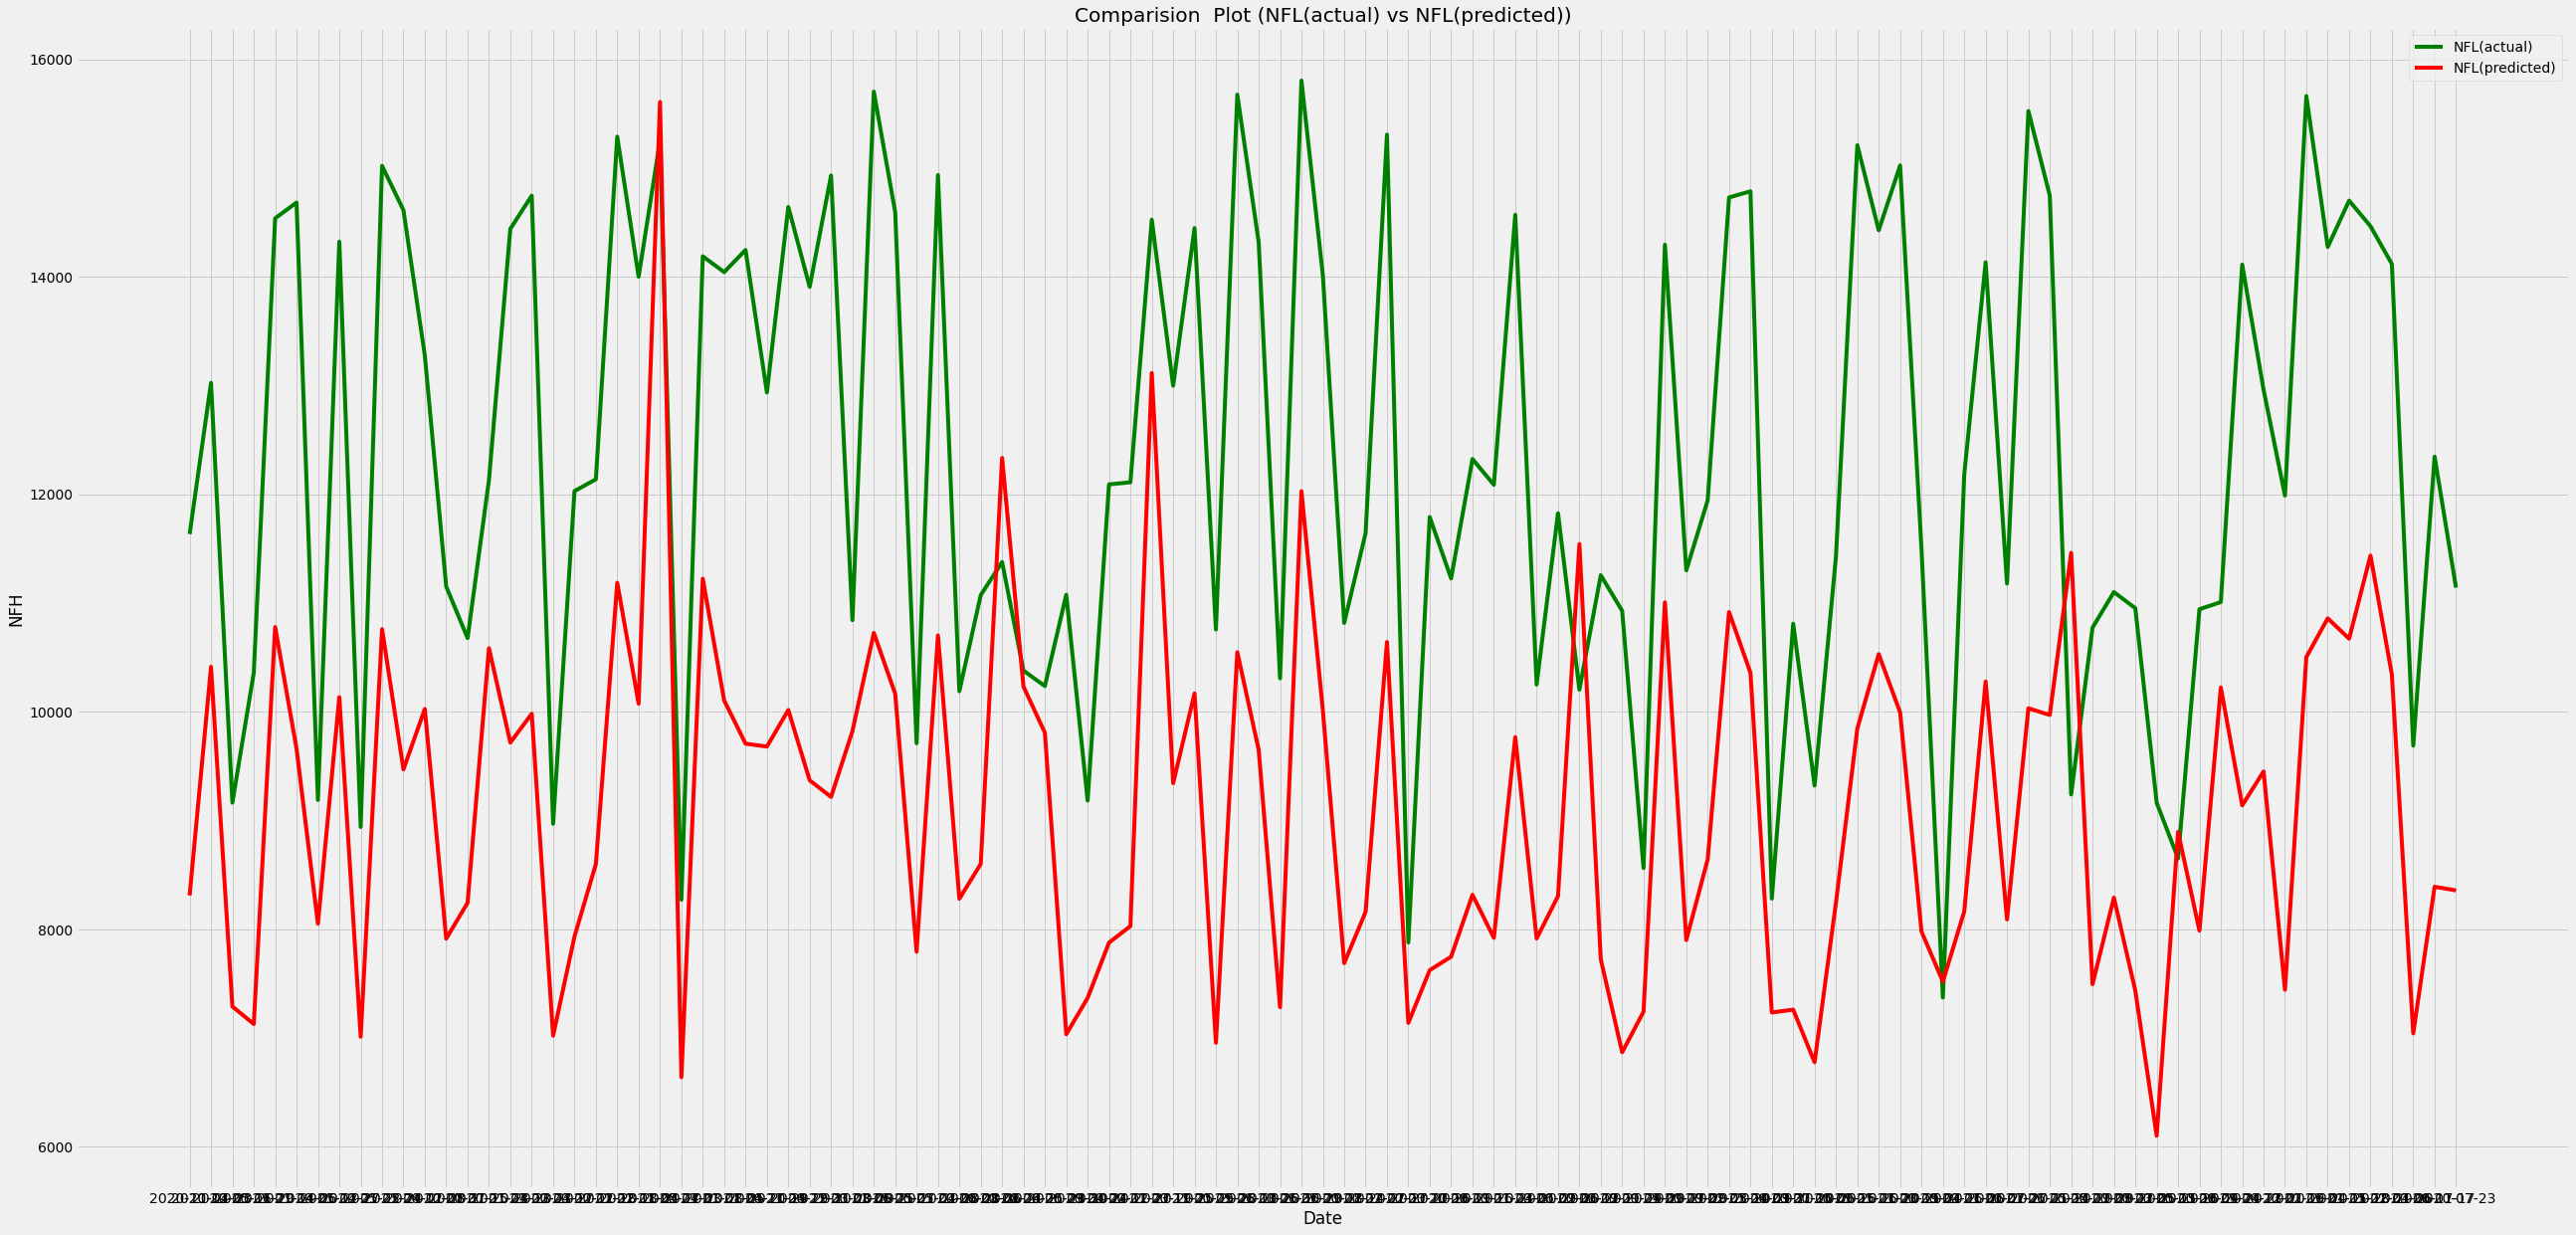

In [ ]:
plt.figure(figsize=(40,20))
plt.plot(date,y_test,label='NFL(actual)',color='green')
plt.plot(date,yhat,label='NFL(predicted)',color='red')
plt.grid(True)
plt.title('Comparision  Plot (NFL(actual) vs NFL(predicted))')
plt.legend()
plt.xlabel('Date')
plt.ylabel('NFH')
plt.style.use('fivethirtyeight')
plt.show()
